In [2]:
pip install -U altair 

Note: you may need to restart the kernel to use updated packages.


# Handedness and Tennis Success 

## Introduction

Left-handed tennis players were hypothesized to possess superior skills compared to their right-handed counterparts (Holtzen, 2000). The argument suggests that left-handed players, with enhanced spatial, motor, and attentional functions, can strategically serve better. To investigate this hypothesis, we analyze data from Ultimate Tennis Statistics' Player Stats for the Top 500 Players, focusing on variables such as handedness, best rank, prize money, best elo rank, peak elo rating, titles, and GOAT rank. We exclude personal information, social media, coach details, and other variables irrelevant to our research question. Additionally, variables like masters, grand slams, Davis cups, team cups, Olympics, weeks at No. 1, tour finals, current rank, and current elo rating are omitted due to limited data or potential misrepresentation for retired players.





## Methods









### Loading and Cleaning  the Data

For the data analysis of this project, we the pandas and altair packages. We will load both packages below.

In [140]:
import pandas as pd
import altair as alt

To read the data into our notebook, we will use the url (https://drive.google.com/uc?export=download&id=1_MECmUXZuuILYeEOfonSGqodW6qVdhsS) and the read_csv function from the pandas package, naming the data 'data'.

In [141]:
data = pd.read_csv("https://drive.google.com/uc?export=download&id=1_MECmUXZuuILYeEOfonSGqodW6qVdhsS")
data

,Unnamed: 0,Age,Country,Plays,Wikipedia,Current Rank,Best Rank,Name,Backhand,Prize Money,...,Facebook,Twitter,Nicknames,Grand Slams,Davis Cups,Web Site,Team Cups,Olympics,Weeks at No. 1,Tour Finals
0,0,26 (25-04-1993),Brazil,Right-handed,Wikipedia,378 (97),363 (04-11-2019),Oscar Jose Gutierrez,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,18 (22-12-2001),United Kingdom,Left-handed,Wikipedia,326 (119),316 (14-10-2019),Jack Draper,Two-handed,"$59,040",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,32 (03-11-1987),Slovakia,Right-handed,Wikipedia,178 (280),44 (14-01-2013),Lukas Lacko,Two-handed,"US$3,261,567",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,21 (29-05-1998),"Korea, Republic of",Right-handed,Wikipedia,236 (199),130 (10-04-2017),Duck Hee Lee,Two-handed,"$374,093",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,27 (21-10-1992),Australia,Right-handed,Wikipedia,183 (273),17 (11-01-2016),Bernard Tomic,Two-handed,"US$6,091,971",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,20 (13-04-1999),France,Right-handed,Wikipedia,382 (95),380 (11-11-2019),Dan Added,Two-handed,"$57,943",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
496,496,26 (03-09-1993),Austria,Right-handed,Wikipedia,5 (5890),4 (06-11-2017),Dominic Thiem,One-handed,"$22,132,368 15th all-time leader in earnings",...,1.Dominic.Thiem,@ThiemDomi,Dominator,NaN,NaN,dominicthiem.tennis,NaN,NaN,NaN,NaN
497,497,23 (14-03-1996),Netherlands,Left-handed,Wikipedia,495 (60),342 (05-08-2019),Gijs Brouwer,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
498,498,24 (17-05-1995),Ukraine,NaN,Wikipedia,419 (81),419 (20-01-2020),Vladyslav Orlov,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


To visualize all the columns of the data set, we will use the .columns function.

In [142]:
data.columns

Index(['Unnamed: 0', 'Age', 'Country', 'Plays', 'Wikipedia', 'Current Rank',
       'Best Rank', 'Name', 'Backhand', 'Prize Money', 'Height',
       'Favorite Surface', 'Turned Pro', 'Seasons', 'Active',
       'Current Elo Rank', 'Best Elo Rank', 'Peak Elo Rating',
       'Last Appearance', 'Titles', 'GOAT Rank', 'Best Season', 'Retired',
       'Masters', 'Birthplace', 'Residence', 'Weight', 'Coach', 'Facebook',
       'Twitter', 'Nicknames', 'Grand Slams', 'Davis Cups', 'Web Site',
       'Team Cups', 'Olympics', 'Weeks at No. 1', 'Tour Finals'],
      dtype='object')

We will filter out the columns we need to answer our project's question and drop observations that are missing data using the .dropna() function. The columns we will include are plays, best rank, prize money, best elo rank, peak elo rating, titles, and GOAT rank. We will name this 'data_no_na'.

In [143]:
data_filtered = data[['Plays', 'Best Rank', 'Prize Money', 'Best Elo Rank', 'Peak Elo Rating', 'Titles', 'GOAT Rank']].dropna()
data_filtered

,Plays,Best Rank,Prize Money,Best Elo Rank,Peak Elo Rating,Titles,GOAT Rank
4,Right-handed,17 (11-01-2016),"US$6,091,971",21 (23-03-2015),2037 (01-02-2016),4.0,264 (6)
5,Right-handed,31 (20-01-2020),"$1,517,157",33 (19-01-2020),1983 (20-01-2020),1.0,489 (1)
11,Right-handed,4 (09-09-2019),"US$ 10,507,693",4 (14-10-2019),2243 (14-10-2019),7.0,109 (27)
15,Right-handed,3 (13-08-2018),"US$25,889,586 11th all-time leader in earnings",3 (07-06-2010),2329 (14-09-2009),22.0,33 (109)
19,Right-handed,25 (05-08-2019),"US$2,722,314",29 (05-08-2019),1999 (05-08-2019),1.0,489 (1)
...,...,...,...,...,...,...,...
473,Right-handed,8 (21-08-2006),"$8,918,917",9 (20-08-2007),2098 (18-02-2008),4.0,169 (15)
484,Right-handed,29 (11-02-2019),"US$3,304,117",36 (13-05-2019),1962 (28-01-2019),1.0,400 (2)
487,Left-handed,58 (20-03-2017),"$1,703,096",43 (10-01-2020),1952 (10-01-2020),1.0,489 (1)
490,Right-handed,74 (19-02-2018),"US$1,048,314",57 (12-02-2018),1904 (12-02-2018),1.0,489 (1)


Several columns in the dataset contain multiple values per cell. The best rank, best elo rank, and peak elo rating columns include dates indicating when the ranking or rating was achieved, which is irrelevant to our predictive question. Therefore, we will exclude this data relating to dates. In the GOAT rank column, both the player's ranking and the points determining their ranking are present in brackets. To simplify, we will remove the points from the brackets, using only the ranking. The prize money column contains additional string information, but for our analysis, we will retain only the prize money values. In the data cleaning process, we will ensure each cell contains a single value, filter for relevant data, and convert columns (excluding handedness) from object type to numeric data.

To streamline the data with a single value per cell, we will use information from the pandas API reference on the str.split function ("Pandas.series.str.split," 2023). This process will be executed in multiple steps, starting with the GOAT rank column. Using the space as a delimiter, we will separate the values and label the resulting columns as 'GOAT Rank' (to be retained) and 'GOAT Discard' (to be discarded). This column renaming facilitates easy elimination of unnecessary columns during the merging phase. We will repeat this process with the peak elo rating, best elo rank, and best rank columns

In [146]:
data_split_GOAT = data_no_na['GOAT Rank'].str.split(" ", expand = True)
data_split_GOAT = data_split_GOAT.rename(columns={0:"GOAT Rank", 1:"GOAT Discard"})
data_split_GOAT

,GOAT Rank,GOAT Discard
4,264,(6)
5,489,(1)
11,109,(27)
15,33,(109)
19,489,(1)
...,...,...
473,169,(15)
484,400,(2)
487,489,(1)
490,489,(1)


In [147]:
data_split_Peak_Elo = data_no_na['Peak Elo Rating'].str.split(" ", expand = True)
data_split_Peak_Elo = data_split_Peak_Elo.rename(columns={0:"Peak Elo Rating", 1:"Peak Elo Discard"})
data_split_Peak_Elo

,Peak Elo Rating,Peak Elo Discard
4,2037,(01-02-2016)
5,1983,(20-01-2020)
11,2243,(14-10-2019)
15,2329,(14-09-2009)
19,1999,(05-08-2019)
...,...,...
473,2098,(18-02-2008)
484,1962,(28-01-2019)
487,1952,(10-01-2020)
490,1904,(12-02-2018)


In [148]:
data_split_Best_Elo = data_no_na['Best Elo Rank'].str.split(" ", expand = True)
data_split_Best_Elo = data_split_Best_Elo.rename(columns={0:"Best Elo Rank", 1:"Best Elo Discard"})
data_split_Best_Elo

,Best Elo Rank,Best Elo Discard
4,21,(23-03-2015)
5,33,(19-01-2020)
11,4,(14-10-2019)
15,3,(07-06-2010)
19,29,(05-08-2019)
...,...,...
473,9,(20-08-2007)
484,36,(13-05-2019)
487,43,(10-01-2020)
490,57,(12-02-2018)


In [149]:
data_split_Best_Rank = data_no_na['Best Rank'].str.split(" ", expand = True)
data_split_Best_Rank = data_split_Best_Rank.rename(columns={0:"Best Rank", 1:"Best Rank Discard"})
data_split_Best_Rank

,Best Rank,Best Rank Discard
4,17,(11-01-2016)
5,31,(20-01-2020)
11,4,(09-09-2019)
15,3,(13-08-2018)
19,25,(05-08-2019)
...,...,...
473,8,(21-08-2006)
484,29,(11-02-2019)
487,58,(20-03-2017)
490,74,(19-02-2018)


Finally, we will remove all unnecessary information from the prize money column using the str.strip ("Pandas.Series.str.strip," 2023), str.replace ("Pandas.series.str.replace," 2023), and str.extract ("Pandas.series.str.extract," 2023) functions from the pandas API reference. We will also use the DataFrame function to make sure the output is a data frame and rename the column as 'Prize Money'. 

In [151]:
data_clean_Prize_Money= data_no_na['Prize Money'].str.strip('$US')
data_clean_Prize_Money= data_clean_Prize_Money.str.strip('all-time leader in earnings')
data_clean_Prize_Money= data_clean_Prize_Money.str.replace(',','')
data_clean_Prize_Money= data_clean_Prize_Money.str.extract(r'(\d+)', expand=False)
data_clean_Prize_Money= pd.DataFrame(data_clean_Prize_Money)
data_clean_Prize_Money= data_clean_Prize_Money.rename(columns={0:"Prize Money"})
data_clean_Prize_Money

,Prize Money
4,6091971
5,1517157
11,10507693
15,25889586
19,2722314
...,...
473,8918917
484,3304117
487,1703096
490,1048314


Now we can combine the columns from each individual step. Using the concat function from pandas, we will concantenate the plays column from the data_no_na data frame, data_split_GOAT, data_split_Peak_Elo, data_split_Best_Elo, data_split_Best_Rank, and data_clean_Prize_Money. This data frame will be called 'tennis'. 

In [152]:
tennis = pd.concat(
    [data_no_na['Plays'], data_no_na['Titles'], data_split_GOAT, data_split_Peak_Elo, data_split_Best_Elo, 
     data_split_Best_Rank, data_clean_Prize_Money],
    axis=1,
)
tennis

,Plays,Titles,GOAT Rank,GOAT Discard,Peak Elo Rating,Peak Elo Discard,Best Elo Rank,Best Elo Discard,Best Rank,Best Rank Discard,Prize Money
4,Right-handed,4.0,264,(6),2037,(01-02-2016),21,(23-03-2015),17,(11-01-2016),6091971
5,Right-handed,1.0,489,(1),1983,(20-01-2020),33,(19-01-2020),31,(20-01-2020),1517157
11,Right-handed,7.0,109,(27),2243,(14-10-2019),4,(14-10-2019),4,(09-09-2019),10507693
15,Right-handed,22.0,33,(109),2329,(14-09-2009),3,(07-06-2010),3,(13-08-2018),25889586
19,Right-handed,1.0,489,(1),1999,(05-08-2019),29,(05-08-2019),25,(05-08-2019),2722314
...,...,...,...,...,...,...,...,...,...,...,...
473,Right-handed,4.0,169,(15),2098,(18-02-2008),9,(20-08-2007),8,(21-08-2006),8918917
484,Right-handed,1.0,400,(2),1962,(28-01-2019),36,(13-05-2019),29,(11-02-2019),3304117
487,Left-handed,1.0,489,(1),1952,(10-01-2020),43,(10-01-2020),58,(20-03-2017),1703096
490,Right-handed,1.0,489,(1),1904,(12-02-2018),57,(12-02-2018),74,(19-02-2018),1048314


Now we can drop the columns that aren't needed for our analysis (labeled with 'discard' in their column titles) using the drop function. This data frame will be called 'tennis_clean'. 

In [153]:
tennis_clean = tennis.drop(columns=['GOAT Discard', 'Peak Elo Discard', 'Best Elo Discard', 'Best Rank Discard'])
tennis_clean

,Plays,Titles,GOAT Rank,Peak Elo Rating,Best Elo Rank,Best Rank,Prize Money
4,Right-handed,4.0,264,2037,21,17,6091971
5,Right-handed,1.0,489,1983,33,31,1517157
11,Right-handed,7.0,109,2243,4,4,10507693
15,Right-handed,22.0,33,2329,3,3,25889586
19,Right-handed,1.0,489,1999,29,25,2722314
...,...,...,...,...,...,...,...
473,Right-handed,4.0,169,2098,9,8,8918917
484,Right-handed,1.0,400,1962,36,29,3304117
487,Left-handed,1.0,489,1952,43,58,1703096
490,Right-handed,1.0,489,1904,57,74,1048314


The final step of the data cleaning process is to ensure the predictor columns are numeric since we will be wanting to use functions on the predictor columns that will treat them as numbers. We will change the predictor columns to numeric data types using the pandas.to_numeric function. Included below is a code cell where the info function is applied to the tennis data set, checking to see which columns are object types. We will name the data frame that has it's predictor variables converted to numerical data 'tennis_clean', check again with the info function, and this will be the final version of the clean data. 

In [154]:
tennis_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95 entries, 4 to 496
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Plays            95 non-null     object 
 1   Titles           95 non-null     float64
 2   GOAT Rank        95 non-null     object 
 3   Peak Elo Rating  95 non-null     object 
 4   Best Elo Rank    95 non-null     object 
 5   Best Rank        95 non-null     object 
 6   Prize Money      95 non-null     object 
dtypes: float64(1), object(6)
memory usage: 5.9+ KB


In [155]:
tennis_clean["Titles"] = pd.to_numeric(tennis_clean["Titles"])
tennis_clean["GOAT Rank"] = pd.to_numeric(tennis_clean["GOAT Rank"])
tennis_clean["Peak Elo Rating"] = pd.to_numeric(tennis_clean["Peak Elo Rating"])
tennis_clean["Best Elo Rank"] = pd.to_numeric(tennis_clean["Best Elo Rank"])
tennis_clean["Best Rank"] = pd.to_numeric(tennis_clean["Best Rank"])
tennis_clean["Prize Money"] = pd.to_numeric(tennis_clean["Prize Money"])
tennis_clean

,Plays,Titles,GOAT Rank,Peak Elo Rating,Best Elo Rank,Best Rank,Prize Money
4,Right-handed,4.0,264,2037,21,17,6091971
5,Right-handed,1.0,489,1983,33,31,1517157
11,Right-handed,7.0,109,2243,4,4,10507693
15,Right-handed,22.0,33,2329,3,3,25889586
19,Right-handed,1.0,489,1999,29,25,2722314
...,...,...,...,...,...,...,...
473,Right-handed,4.0,169,2098,9,8,8918917
484,Right-handed,1.0,400,1962,36,29,3304117
487,Left-handed,1.0,489,1952,43,58,1703096
490,Right-handed,1.0,489,1904,57,74,1048314


In [156]:
tennis_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95 entries, 4 to 496
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Plays            95 non-null     object 
 1   Titles           95 non-null     float64
 2   GOAT Rank        95 non-null     int64  
 3   Peak Elo Rating  95 non-null     int64  
 4   Best Elo Rank    95 non-null     int64  
 5   Best Rank        95 non-null     int64  
 6   Prize Money      95 non-null     int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 5.9+ KB


### Spliting the Data into Training Data and Testing Data and Exploring the Training Data

We will import the test_train_split function from the sklearn package to split the data into training and testing data and the numpy package for splitting the data randomly below. 

In [157]:
import numpy as np
from sklearn.model_selection import train_test_split

We'll now partition the data into training and testing sets. Using the np.random.seed function, we'll set the seed and employ the test_train_split function on the tennis_clean dataframe. As we want to train a relatively accurate model and have a good evaluation of the model’s performance, we will designate 75% of the data as training data and 25% as testing data. Additionally, we'll stratify the data based on the class label (plays) to maintain similar label proportions in both sets. The training data will be called 'tennis_train', and the testing data will be called 'tennis_test'.

In [158]:
np.random.seed(1)

tennis_train, tennis_test = train_test_split(
    tennis_clean, train_size=0.75, stratify=tennis_clean['Plays']
)

We will now use the info function to check that the data has been split correctly.

In [159]:
tennis_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71 entries, 207 to 62
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Plays            71 non-null     object 
 1   Titles           71 non-null     float64
 2   GOAT Rank        71 non-null     int64  
 3   Peak Elo Rating  71 non-null     int64  
 4   Best Elo Rank    71 non-null     int64  
 5   Best Rank        71 non-null     int64  
 6   Prize Money      71 non-null     int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 4.4+ KB


In [160]:
tennis_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24 entries, 316 to 29
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Plays            24 non-null     object 
 1   Titles           24 non-null     float64
 2   GOAT Rank        24 non-null     int64  
 3   Peak Elo Rating  24 non-null     int64  
 4   Best Elo Rank    24 non-null     int64  
 5   Best Rank        24 non-null     int64  
 6   Prize Money      24 non-null     int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 1.5+ KB


One concern in answering our predictive question is that there may be significantly less left-handed classifications in the data set than there are right-handed classifications. This may impact the model as the K-nearest neighbors algorithm bases classification on the majority classification of nearby points. To check the percentage of each class (right-handed and left-handed) in the data set, we will use the value_counts function with the normalize argument set to true.

In [161]:
tennis_clean['Plays'].value_counts(normalize=True)

Right-handed    0.852632
Left-handed     0.147368
Name: Plays, dtype: float64

In [162]:
tennis_train['Plays'].value_counts(normalize=True)

Right-handed    0.859155
Left-handed     0.140845
Name: Plays, dtype: float64

In [163]:
tennis_test['Plays'].value_counts(normalize=True)

Right-handed    0.833333
Left-handed     0.166667
Name: Plays, dtype: float64

Visualizing the number of each classification by creating a bar plot also allows us to check if there are significantly less left-handed classification that right-handed classifications. We will use the chart function from the altair package to create the plot and specify that we want a bar plot by using mark_bar. The x-axis will be the different classifications and the y-axis will be the counts for each classification. We will name this plot 'Figure_1'.

In [164]:
Figure_1 = alt.Chart(tennis_train).mark_bar().encode(
    x=alt.X("Plays").title("Handedness"),
    y=alt.Y("count()").title("Count")
)
Figure_1

alt.Chart(...)

As suspected, there is a much greater proportion of right-handed classes than left-handed classes. In an effort to decrease the class imbalance, we will oversample the left-handed class in the training data. We will need to use the resample function from the sklearn package so we will begin by importing that. Then, we will need to split the training data into two different data groups depending on class through filtering. Next, we will use the resample function on the left-handed observations to increase the number of observations to match the right-handed observations by setting the n_samples argument to equal number of right-handed observations. Finally we will use the concat function to concatenate the data back together.

In [165]:
from sklearn.utils import resample

right_tennis = tennis_train[tennis_train['Plays'] == 'Right-handed']
left_tennis = tennis_train[tennis_train['Plays'] == 'Left-handed']

left_tennis_upsample = resample(
    left_tennis, n_samples = right_tennis.shape[0]
)
    
tennis_train = pd.concat((left_tennis_upsample, right_tennis))

To check that the number of classes are now the same, we will use the value_counts function.

In [166]:
tennis_train['Plays'].value_counts(normalize = True)

Left-handed     0.5
Right-handed    0.5
Name: Plays, dtype: float64

To explore the data further, we will also calculate the means of each predictor variable in our analysis using the mean function and specifying the numeric_only argument as true to exclude the classifier variable.

In [167]:
tennis_train.mean(numeric_only=True)

Titles             6.057377e+00
GOAT Rank          3.044508e+02
Peak Elo Rating    2.035820e+03
Best Elo Rank      2.986885e+01
Best Rank          2.440984e+01
Prize Money        1.035640e+07
dtype: float64

The last step of our exploratory data analysis is to visualize the training data. To do so, we will create several scatters plot of the training data, coloring the left-handed and right-handed classes differently to visualize their distribution. We will use the chart function from altair and specify that we want a scatter plot by using mark_circle. We will create three scatter plots, visualizing each predictor variable once with Figure_2 being Best Rank (y) vs. Prize Money (x), Figure_3 being Peak Elo Rating (y) vs. Best Elo Rank (x), and Figure_4 being Titles (y) vs. GOAT Rank (x). 

In [168]:
Figure_2 = alt.Chart(tennis_train).mark_circle().encode(
    x=alt.X("Prize Money").title("Total Prize Money (USD)"),
    y=alt.Y("Best Rank").title("Player's Best Rank"),
    color=alt.Color("Plays").title("Handedness")
)
Figure_2

alt.Chart(...)

In [169]:
Figure_3 = alt.Chart(tennis_train).mark_circle().encode(
    x=alt.X("Best Elo Rank").title("Player's Best Elo Rank"),
    y=alt.Y("Peak Elo Rating").title("Player's Peak Elo Rating"),
    color=alt.Color("Plays").title("Handedness")
)
Figure_3

alt.Chart(...)

In [170]:
Figure_4 = alt.Chart(tennis_train).mark_circle().encode(
    x=alt.X("GOAT Rank").title("Player's GOAT Elo Rank"),
    y=alt.Y("Titles").title("Number of Titles"),
    color=alt.Color("Plays").title("Handedness")
)
Figure_4

alt.Chart(...)

### Data Analysis

We chose to use KNN classification as we are predicting a categorical variable based on a number of predictor variables. We'll begin by initiating a preprocessor. Using make_column_transformer, we'll choose the predictor variables for scaling. The selected variables will undergo transformation with StandardScaler(), ensuring a mean of 0 and a standard deviation of 1. This step eliminates outliers that might impact Euclidean distance, enhancing the accuracy of our K Nearest Neighbor algorithm by reducing noise in the data.

In [171]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer


tennis_preprocessor = make_column_transformer(
    (StandardScaler(), ['Best Rank', 'Prize Money', 'Best Elo Rank', 'Peak Elo Rating', 'Titles', 'GOAT Rank']),
)

To tune our model by looking at the classifier accuracy for a range of K values, We'll start by creating a pipeline with our preprocessor and with a KNeighborsClassifier that has an unspecified number of neighbors.

In [172]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline

knn = KNeighborsClassifier()
tennis_tune_pipe = make_pipeline(tennis_preprocessor, knn)

The parameter identifier we are using is "kneighborsclassifier__n_neighbors" so our next step is to create a dictionary called "parameter_grid" to designate which parameter values of K to try using that parameter identifier. We will specify the range to the number of observations in the data set without skipping any values to maximize the values of K we try.

In [173]:
parameter_grid = {
    "kneighborsclassifier__n_neighbors": range(1, 96, 1),
}

We will now use the GridSearchCV function from the sklearn package, passing tennis_tune_pipe as the estimator and parameter_grid as the param_grid. We decided to specify 5 folds.

In [174]:
from sklearn.model_selection import GridSearchCV

tennis_tune_grid = GridSearchCV(
    estimator=tennis_tune_pipe,
    param_grid=parameter_grid,
    cv=5
)

Using the fit function on tennis_tune_grid to start the tuning process, we'll add the predictor variables as the x argument for the fit function and the response variable as the y argument. The cv_results_ attribute will give us the cross-validation accuracy estimate for each value of K and the DataFrame function will make the results more readable. 

In [175]:
accuracies_grid = pd.DataFrame(
    tennis_tune_grid.fit(
        tennis_train[['Best Rank', 'Prize Money', 'Best Elo Rank', 'Peak Elo Rating', 'Titles', 'GOAT Rank']],
        tennis_train["Plays"]
    ).cv_results_
)

To look at the cross validation accuracy estimates and standard error for the K values, we will create a dataframe that contains columns of these values by filtering the accuracies_grid for the "param_kneighborsclassifier__n_neighbors", "mean_test_score", "std_test_score" columns and transforming the standard deviation to standard error by dividing it the square root of the number of folds and dropping the old column.

In [176]:
accuracies_grid = (
    accuracies_grid[[
        "param_kneighborsclassifier__n_neighbors",
        "mean_test_score",
        "std_test_score"
    ]]
    .assign(sem_test_score=accuracies_grid["std_test_score"] / 5**(1/2))
    .rename(columns={"param_kneighborsclassifier__n_neighbors": "n_neighbors"})
    .drop(columns=["std_test_score"])
)
accuracies_grid

,n_neighbors,mean_test_score,sem_test_score
0,1,0.886000,0.023431
1,2,0.828667,0.019852
2,3,0.844667,0.012626
3,4,0.779000,0.017749
4,5,0.754333,0.025288
...,...,...,...
90,91,0.516000,0.019100
91,92,0.500000,0.005657
92,93,0.500000,0.005657
93,94,0.500000,0.005657


To visualize the accuracies of the k values, we will plot a point and line chart called Figure_5 with k values on the x-axis and accuracy estimated on the y-axis.

In [177]:
Figure_5 = alt.Chart(accuracies_grid).mark_line(point=True).encode(
    x=alt.X("n_neighbors").title("Neighbors"),
    y=alt.Y("mean_test_score")
        .scale(domain=(0.50, 0.90))
        .title("Accuracy estimate")
)

Figure_5

alt.Chart(...)

It looks like the k values that gives the greatest accuracy is 1, so we will use that to train our model, setting the KNeighborsClassifier argument to 1. 

We created a pipeline using the make_pipeline() argument to execute our preprocessor and classification step. Using the .fit() argument we will fit our training data into our model which will train our model before applying our test data.

In [178]:
knn = KNeighborsClassifier(n_neighbors=1)

X = tennis_train[['Best Rank', 'Prize Money', 'Best Elo Rank', 'Peak Elo Rating', 'Titles', 'GOAT Rank']]
y = tennis_train['Plays']

knn_fit = make_pipeline(tennis_preprocessor, knn).fit(X, y)
knn_fit

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['Best Rank', 'Prize Money',
                                                   'Best Elo Rank',
                                                   'Peak Elo Rating', 'Titles',
                                                   'GOAT Rank'])])),
                ('kneighborsclassifier', KNeighborsClassifier(n_neighbors=1))])

After training our model, we will apply our model onto our test split. This is done with the .predict() argument that will call on the pipeline to make a prediction on unseen data. Using the .assign() function, our predictions that come from our model will be displayed in an additional column within our test data frame. 

To determine the accuracy of the model we will run the .score() argument on our predictor and response variable. 

In [179]:
tennis_test_predictions = tennis_test.assign(
    predicted = knn_fit.predict(tennis_test[['Best Rank', 'Prize Money', 'Best Elo Rank', 'Peak Elo Rating', 'Titles', 'GOAT Rank']])
)
tennis_test_predictions[['Plays', 'predicted']]


,Plays,predicted
316,Right-handed,Right-handed
44,Right-handed,Right-handed
154,Right-handed,Left-handed
49,Right-handed,Right-handed
345,Left-handed,Right-handed
175,Left-handed,Right-handed
422,Right-handed,Right-handed
362,Left-handed,Right-handed
128,Right-handed,Right-handed
5,Right-handed,Right-handed


In [180]:
tennis_acc_1 = knn_fit.score(
    tennis_test[['Best Rank', 'Prize Money', 'Best Elo Rank', 'Peak Elo Rating', 'Titles', 'GOAT Rank']],
    tennis_test["Plays"]
)
tennis_acc_1

0.7916666666666666

We have achieved a score about 79.2% accuracy in predicting handedness. To look more closely at the performance of our classifier, we will create a confusion matrix using the crosstab function, visualize it using a heatmap from the Seaborn library named Figure_6 (T, 2019), and will look at the major classifier using the value_counts function.

In [181]:
cf_matrix = pd.crosstab(
    tennis_test_predictions["Plays"],
    tennis_test_predictions["predicted"]
)
cf_matrix

predicted,Left-handed,Right-handed
Plays,,
Left-handed,0,4
Right-handed,1,19


In [182]:
tennis_train["Plays"].value_counts(normalize=True)

Left-handed     0.5
Right-handed    0.5
Name: Plays, dtype: float64

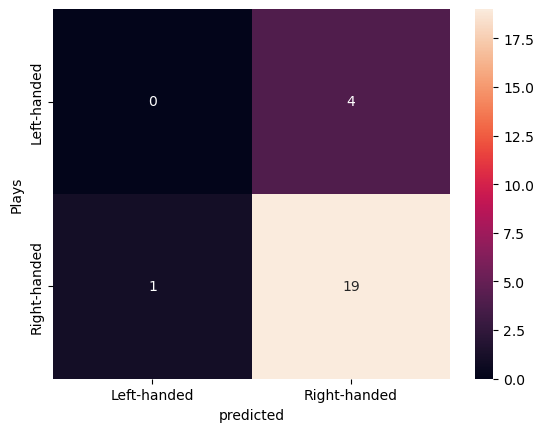

In [183]:
import seaborn as sns

Figure_6 = sns.heatmap(cf_matrix, annot=True)

### Discussion
We found that success (measured with best rank, prize money, best elo rank, peak elo rank, titles, and goat rank) does not have a very strong correlation with handedness. When we performed our KNN analysis, we got a prediction accuracy of about 79.2% which did not allow us to conclusively determine whether handedness is related to success. Compared to the major classifier, which was around 50%, there does seem to be improvement, indicating that useful information from the predictor variables is being extracted, however, the values of the confusion matrix indicate that the model isn't very good at classifying left-handed players. Given the size of the data set, the class imbalance, the elimination of many observations with missing data, and Figures 2,3 and 4, we knew there was a possibility that we wouldn't see a strong correlation. Our analysis could lead to further questions that look more deeply into tennis and handedness. Analysis of not just professional tennis players but also amateur tennis players would increase the pool of data being drawn from. The study we based our question on was specifically addressing a player's technical skills rather than their ability to be successful, so looking for a correlation between handedness and serving may show better results that success in tennis, which can result from a multitude of factors, not just handedness.

### References

Holtzen D. W. (2000). Handedness and professional tennis. The International journal of neuroscience, 105(1-4), 101–119. https://doi.org/10.3109/00207450009003270

FlashScore. (2019, December 2). Ultimate Tennis Statistics. https://www.ultimatetennisstatistics.com/

Pandas.series.str.extract#. pandas.Series.str.extract - pandas 2.1.4 documentation. (2023). https://pandas.pydata.org/docs/reference/api/pandas.Series.str.extract.html 


Pandas.series.str.replace#. pandas.Series.str.replace - pandas 2.1.4 documentation. (2023). https://pandas.pydata.org/docs/reference/api/pandas.Series.str.replace.html 


Pandas.series.str.split#. pandas.Series.str.split - pandas 2.1.4 documentation. (2023). https://pandas.pydata.org/docs/reference/api/pandas.Series.str.split.html 


Pandas.Series.str.strip#. pandas.Series.str.strip - pandas 2.1.4 documentation. (2023). https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html 

T, D. (2019, July 25). Confusion matrix visualization. Medium. https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea 